<a href="https://colab.research.google.com/github/FatemehTahavori/QuickDraw/blob/main/Copy_of_Sketcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the Class names 

This file contains a subset of the quick draw classes. I choose around 100 classes from the dataset. 

In [ ]:
!wget 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt'

--2021-07-10 20:52:48--  https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: ‘mini_classes.txt.1’

mini_classes.txt.1  100%[===================>]     760  --.-KB/s    in 0s      

2021-07-10 20:52:48 (45.3 MB/s) - ‘mini_classes.txt.1’ saved [760/760]



Read the classes names 

In [ ]:
f = open("mini_classes.txt","r")
# And for reading use
classes = f.readlines()
print(classes)
f.close()

['drums\n', 'sun\n', 'laptop\n', 'anvil\n', 'baseball_bat\n', 'ladder\n', 'eyeglasses\n', 'grapes\n', 'book\n', 'dumbbell\n', 'traffic_light\n', 'wristwatch\n', 'wheel\n', 'shovel\n', 'bread\n', 'table\n', 'tennis_racquet\n', 'cloud\n', 'chair\n', 'headphones\n', 'face\n', 'eye\n', 'airplane\n', 'snake\n', 'lollipop\n', 'power_outlet\n', 'pants\n', 'mushroom\n', 'star\n', 'sword\n', 'clock\n', 'hot_dog\n', 'syringe\n', 'stop_sign\n', 'mountain\n', 'smiley_face\n', 'apple\n', 'bed\n', 'shorts\n', 'broom\n', 'diving_board\n', 'flower\n', 'spider\n', 'cell_phone\n', 'car\n', 'camera\n', 'tree\n', 'square\n', 'moon\n', 'radio\n', 'hat\n', 'pizza\n', 'axe\n', 'door\n', 'tent\n', 'umbrella\n', 'line\n', 'cup\n', 'fan\n', 'triangle\n', 'basketball\n', 'pillow\n', 'scissors\n', 't-shirt\n', 'tooth\n', 'alarm_clock\n', 'paper_clip\n', 'spoon\n', 'microphone\n', 'candle\n', 'pencil\n', 'envelope\n', 'saw\n', 'frying_pan\n', 'screwdriver\n', 'helmet\n', 'bridge\n', 'light_bulb\n', 'ceiling_fan\n'

In [ ]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]
print(classes)


['drums', 'sun', 'laptop', 'anvil', 'baseball_bat', 'ladder', 'eyeglasses', 'grapes', 'book', 'dumbbell', 'traffic_light', 'wristwatch', 'wheel', 'shovel', 'bread', 'table', 'tennis_racquet', 'cloud', 'chair', 'headphones', 'face', 'eye', 'airplane', 'snake', 'lollipop', 'power_outlet', 'pants', 'mushroom', 'star', 'sword', 'clock', 'hot_dog', 'syringe', 'stop_sign', 'mountain', 'smiley_face', 'apple', 'bed', 'shorts', 'broom', 'diving_board', 'flower', 'spider', 'cell_phone', 'car', 'camera', 'tree', 'square', 'moon', 'radio', 'hat', 'pizza', 'axe', 'door', 'tent', 'umbrella', 'line', 'cup', 'fan', 'triangle', 'basketball', 'pillow', 'scissors', 't-shirt', 'tooth', 'alarm_clock', 'paper_clip', 'spoon', 'microphone', 'candle', 'pencil', 'envelope', 'saw', 'frying_pan', 'screwdriver', 'helmet', 'bridge', 'light_bulb', 'ceiling_fan', 'key', 'donut', 'bird', 'circle', 'beard', 'coffee_cup', 'butterfly', 'bench', 'rifle', 'cat', 'sock', 'ice_cream', 'moustache', 'suitcase', 'hammer', 'rain

# Download the Dataset 

Loop over the classes and download the currospondent data

In [ ]:
!mkdir data

In [ ]:
import urllib.request
def download():
  
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [ ]:
download() 

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_dat

# Imports 

In [ ]:
import os
import glob
import numpy as np
#from tensorflow.keras import layers
#from tensorflow import keras 
import tensorflow as tf

# Load the Data 

Each class contains different number samples of arrays stored as .npy format. Since we have some memory limitations we only load 5000 images per class.  

In [ ]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 4000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [ ]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

In [ ]:
print(len(x_train))
print(np.shape(x_train))
x_train.resize(len(x_train), 1, 28, 28)
print(np.shape(x_train))


320000
(320000, 784)
(320000, 1, 28, 28)


In [ ]:
print(len(y_train))
print(np.shape(y_train))
print(len(x_test))
print(np.shape(x_test))
x_test.resize(len(x_test), 1, 28, 28)
print(np.shape(x_test))

320000
(320000,)
80000
(80000, 784)
(80000, 1, 28, 28)


Show some random data 

chair


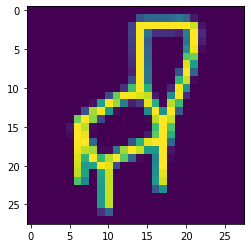

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

# Preprocess the Data 

In [ ]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

chair


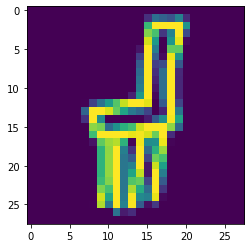

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

# The Model 

In [ ]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

NameError: ignored

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        print(x.shape)
        x = x.view(-1, 32 * 4 * 4)
        print(x.shape)
        x = F.relu(self.fc1(x))
        print(x.shape)
        x = F.relu(self.fc2(x))
        print(x.shape)
        x = self.fc3(x)
        print(x.shape)
        return x


net = Net()

x = torch.rand(2, 1, 28,28)
y = net(x)

torch.Size([2, 16, 12, 12])
torch.Size([2, 32, 4, 4])
torch.Size([2, 512])
torch.Size([2, 120])
torch.Size([2, 84])
torch.Size([2, 10])


In [ ]:
print(net)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
class SimpleLoader(object):
  def __init__(self, data, labels, batch_size=32):
    self.data = data
    self.labels = labels
    self.batch_size = batch_size 
    self.prepare()

  def prepare(self):
    self.niters = self.data.shape[0]//self.batch_size
  
  def get_random_batch(self):
    bid = np.random.choice(self.niters)
    return self.data[bid*self.batch_size:(bid+1)*self.batch_size], self.labels[bid*self.batch_size:(bid+1)*self.batch_size]  # TODO: turn to tensor

mytrainloader = SimpleLoader(x_train, y_train)
mytestloader = SimpleLoader(x_test, y_test)

In [ ]:
for i in range(10000):
  x,y = mytrainloader.get_random_batch()
  optimizer.zero_grad()
  pred = net(x)
  loss = criterion(pred, y)
  loss.backward()
  optimizer.step()
  

# Training 

In [ ]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)

Train on 288000 samples, validate on 32000 samples
Epoch 1/5
 - 14s - loss: 1.8775 - top_k_categorical_accuracy: 0.7930 - val_loss: 1.3543 - val_top_k_categorical_accuracy: 0.8811
Epoch 2/5
 - 13s - loss: 1.2097 - top_k_categorical_accuracy: 0.8960 - val_loss: 1.1262 - val_top_k_categorical_accuracy: 0.9063
Epoch 3/5
 - 13s - loss: 1.0523 - top_k_categorical_accuracy: 0.9132 - val_loss: 1.0283 - val_top_k_categorical_accuracy: 0.9166
Epoch 4/5
 - 13s - loss: 0.9646 - top_k_categorical_accuracy: 0.9220 - val_loss: 0.9908 - val_top_k_categorical_accuracy: 0.9186
Epoch 5/5
 - 13s - loss: 0.9038 - top_k_categorical_accuracy: 0.9282 - val_loss: 0.9460 - val_top_k_categorical_accuracy: 0.9235


In [ ]:
import torch
import torchvision

for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    # for i, data in enumerate(trainloader, 0):
    for i in range(len(x_train)):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        inputs = x_train[i].reshape(28,28)
        inputs = torch.from_numpy(inputs)
        labels = (y_train[i])
        #print(labels)
        #labels = torch.from_numpy(labels)
        labels = torch.tensor(labels).float().unsqueeze(0)



        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

RuntimeError: ignored

# Testing 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 92.20%


# Inference 

['alarm_clock', 'bread', 't-shirt', 'butterfly', 'bird']


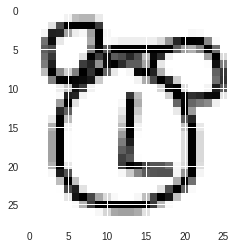

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_test))
img = x_test[idx]
plt.imshow(img.squeeze()) 
pred = model.predict(np.expand_dims(img, axis=0))[0]
ind = (-pred).argsort()[:5]
latex = [class_names[x] for x in ind]
print(latex)

# Store the classes 

In [ ]:
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

# Install TensorFlowJS

In [ ]:
!pip install tensorflowjs 

    100% |████████████████████████████████| 327kB 6.4MB/s 
    100% |████████████████████████████████| 12.2MB 3.5MB/s 
  Found existing installation: numpy 1.14.3
    Uninstalling numpy-1.14.3:
      Successfully uninstalled numpy-1.14.3
  Found existing installation: Keras 2.1.6
    Uninstalling Keras-2.1.6:
      Successfully uninstalled Keras-2.1.6


# Save and Convert 

In [ ]:
model.save('keras.h5')

In [ ]:
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

mkdir: cannot create directory ‘model’: File exists
/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Zip and Download 

In [ ]:
!cp class_names.txt model/class_names.txt

In [ ]:
!zip -r model.zip model 

  adding: model/ (stored 0%)
  adding: model/group5-shard1of1 (deflated 7%)
  adding: model/model.json (deflated 82%)
  adding: model/group2-shard1of1 (deflated 7%)
  adding: model/group3-shard1of1 (deflated 7%)
  adding: model/class_names.txt (deflated 41%)
  adding: model/group1-shard1of1 (stored 0%)
  adding: model/group4-shard1of1 (deflated 7%)


In [ ]:
from google.colab import files
files.download('model.zip')